In [43]:
#importing the necessary library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [44]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [45]:
#checking the number of rows and columns
df.shape

(100000, 9)

In [46]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# Data Preprocessing

In [47]:
#checking if there is any null values or not
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [48]:
#checking the dtypes of an data
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [49]:
#checking if there is any duplicates values or not
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [50]:
#droping the duplicates values
df.drop_duplicates(inplace = True) #making permanently changes

In [51]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99996    False
99997    False
99998    False
99999    False
Length: 96146, dtype: bool

In [52]:
#after removing duplicates values checking the number of rows and columns
df.shape

(96146, 9)

In [53]:
df.columns.unique()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [54]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [55]:
#dropping the gender other
df.drop(df.index[df['gender'] == 'Other'], inplace = True)

In [56]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [59]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,4,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,4,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0


In [60]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  int32  
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 7.0+ MB


# Data Visualization

Text(0.5, 1.0, 'Comparision between Age Vs Diabetes')

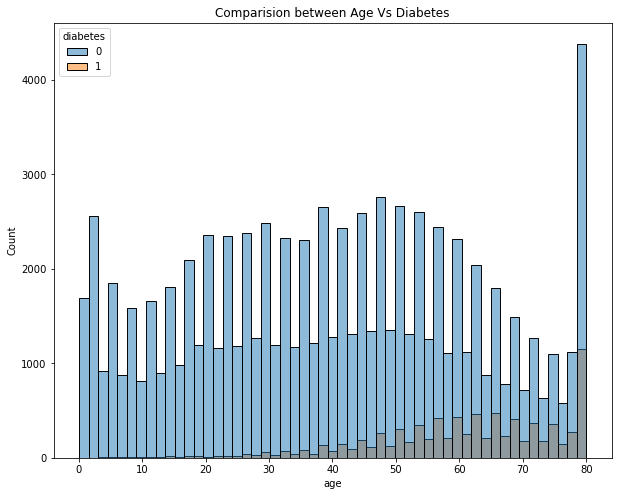

In [61]:
plt.figure(figsize=(10, 8))
sns.histplot(data = df, x = 'age', hue = 'diabetes').set_title("Comparision between Age Vs Diabetes")

<AxesSubplot:xlabel='HbA1c_level', ylabel='Count'>

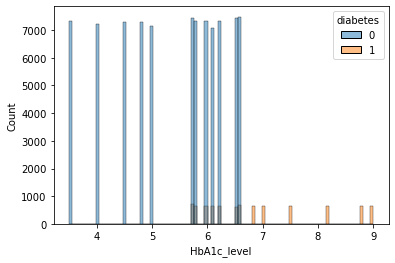

In [62]:
sns.histplot(data = df, x='HbA1c_level', hue = 'diabetes')

We can observe the following patterns
a) The older person is, the higher the risk of diabetes.
b) HbA1c_level after a value of 6, the risk of diabetes is increased

<AxesSubplot:>

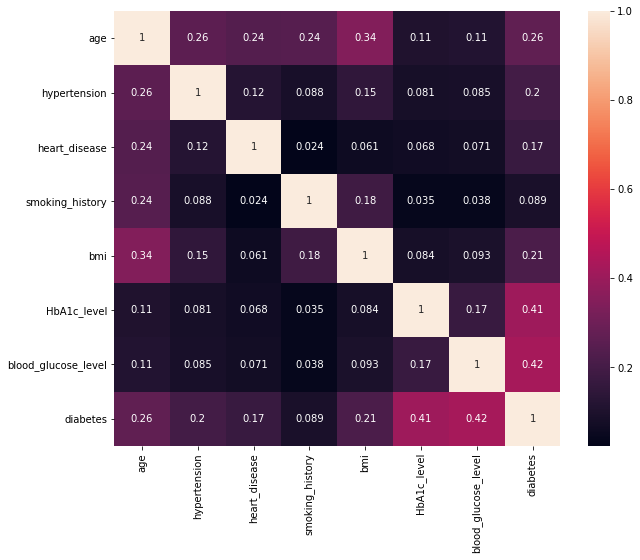

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)

In [64]:
select_feature = df.corr()
select_feature = select_feature.index[abs(select_feature['diabetes']) >= 0.2]

In [65]:
select_feature

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')

# Model buildings

In [68]:
inputs = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
target = df['diabetes']

In [69]:
inputs.head()

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155


In [70]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inputs)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Logistic Regression

In [78]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_accuracy = lr.score(X_train, y_train)
val_accuracy = lr.score(X_test, y_test)

print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(val_accuracy*100))

Train Accuracy: 95.90%
Test Accuracy: 95.68%


# Decision Tree Classifier

In [ ]:

param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model_tree= grid_search.best_estimator_

best_model_tree.fit(X_train, y_train)

train_accuracy = best_model_tree.score(X_train, y_train)
val_accuracy = best_model_tree.score(X_test, y_test)


print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(val_accuracy*100))